<a href="https://colab.research.google.com/github/shubhankarsharma245/IT-Innovation-and-Advantage/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install linearmodels
import pandas as pd
from linearmodels.panel import PanelOLS
df=pd.read_csv('FoodDelivery.csv')
df = df.set_index(['Rider_ID', 'T'])
mod = PanelOLS.from_formula("Delayed_Delivery ~ Treatment:Post + EntityEffects + TimeEffects",
data=df)
result = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(result.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:       Delayed_Delivery   R-squared:                     3.683e-05
Estimator:                   PanelOLS   R-squared (Between):              0.0096
No. Observations:                7759   R-squared (Within):               0.0003
Date:                Tue, Nov 07 2023   R-squared (Overall):              0.0054
Time:                        19:27:44   Log-likelihood                   -2695.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.2151
Entities:                        1909   P-value                           0.6429
Avg Obs:                       4.0644   Distribution:                  F(1,5839)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):             0.1064
                            

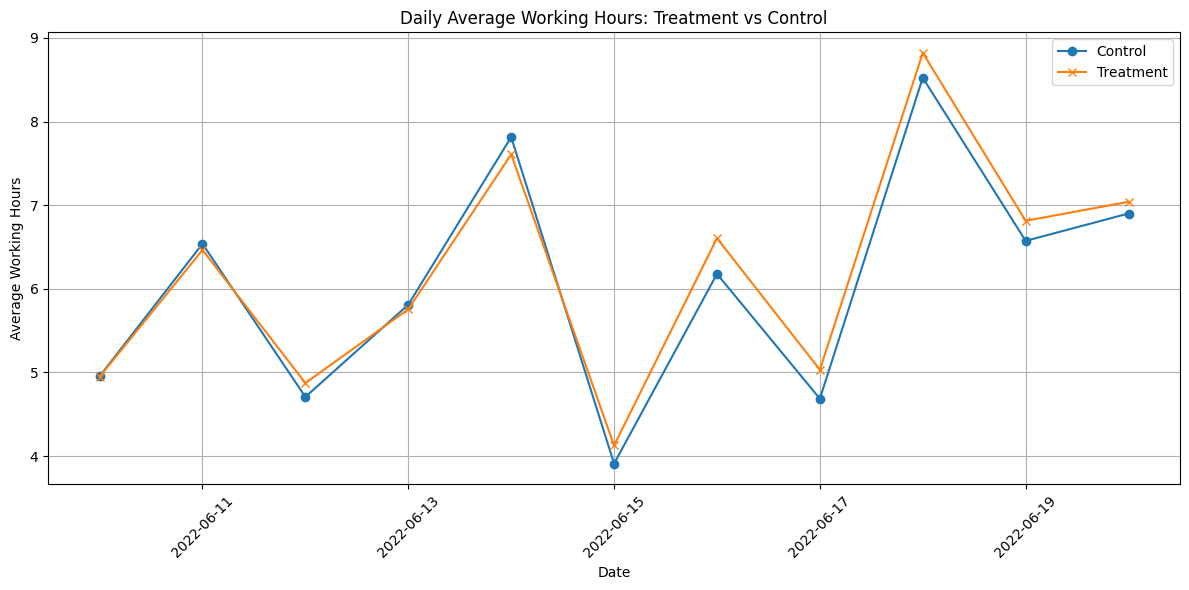

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('FoodDelivery.csv')

# Convert the 'DT' column to datetime
df['DT'] = pd.to_datetime(df['DT'])

# Group by 'DT' and 'Treatment' and calculate the average working hours
daily_avg = df.groupby(['DT', 'Treatment'])['Working_Hours'].mean().reset_index()

# Pivot the data to have 'Treatment' values as columns
pivot_daily_avg = daily_avg.pivot(index='DT', columns='Treatment', values='Working_Hours')

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(pivot_daily_avg.index, pivot_daily_avg[0], label='Control', marker='o')
plt.plot(pivot_daily_avg.index, pivot_daily_avg[1], label='Treatment', marker='x')

# Adding details to the plot
plt.title('Daily Average Working Hours: Treatment vs Control')
plt.xlabel('Date')
plt.ylabel('Average Working Hours')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()

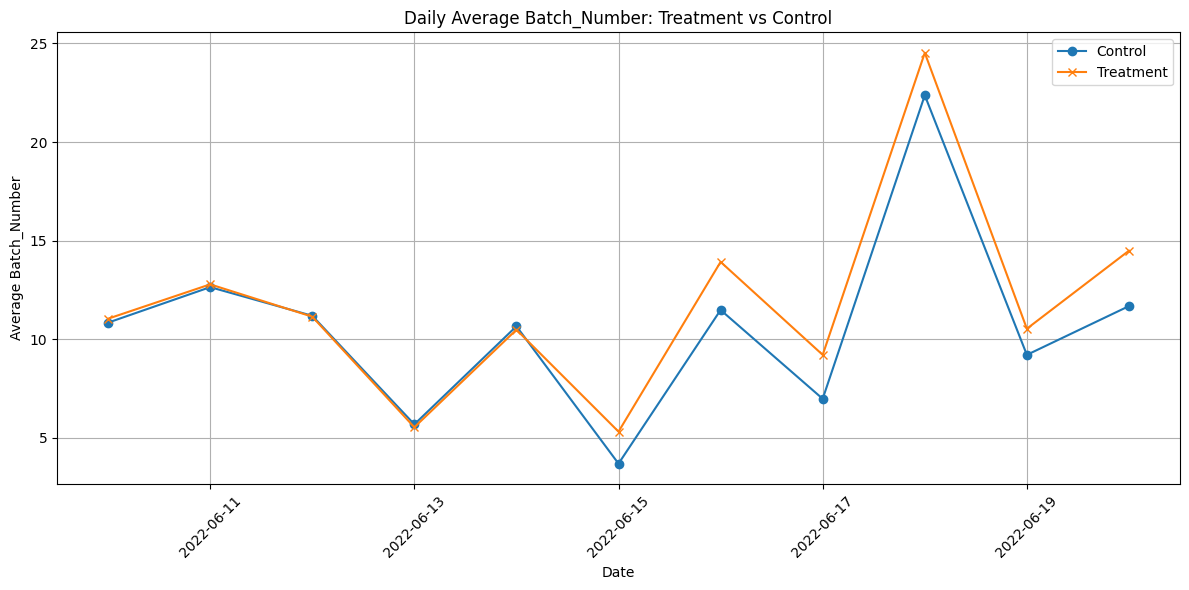

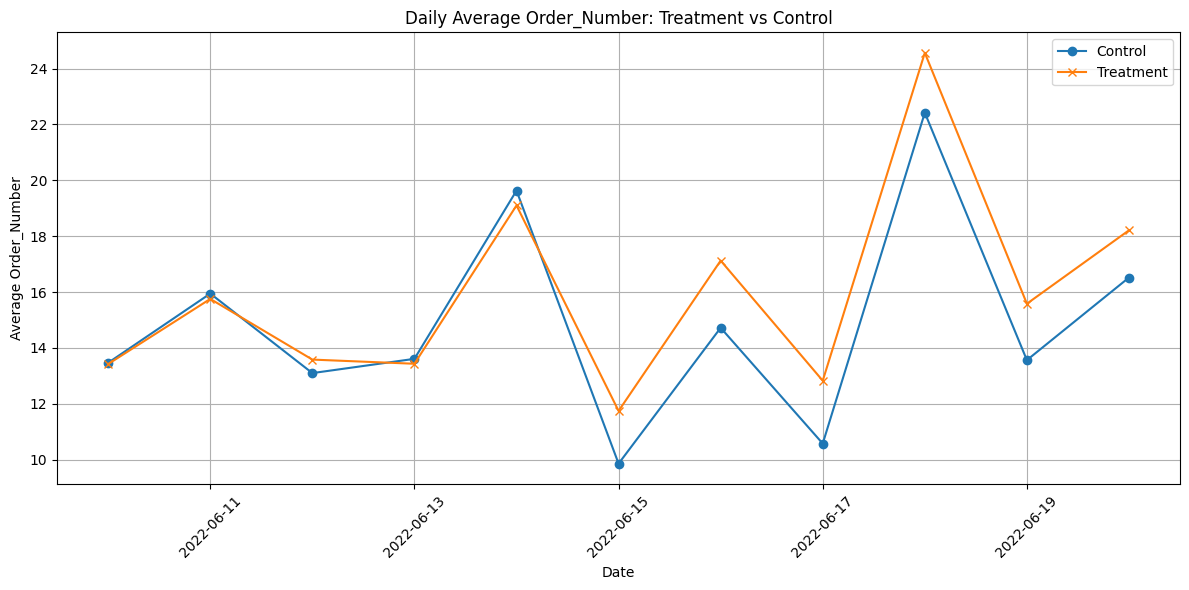

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('FoodDelivery.csv')

# Convert the 'DT' column to datetime
df['DT'] = pd.to_datetime(df['DT'])

# Function to plot a graph for a given column
def plot_daily_average(df, column_name):
    # Group by 'DT' and 'Treatment' and calculate the average of the given column
    daily_avg = df.groupby(['DT', 'Treatment'])[column_name].mean().reset_index()

    # Pivot the data to have 'Treatment' values as columns
    pivot_daily_avg = daily_avg.pivot(index='DT', columns='Treatment', values=column_name)

    # Plot the graph
    plt.figure(figsize=(12, 6))
    plt.plot(pivot_daily_avg.index, pivot_daily_avg[0], label='Control', marker='o')
    plt.plot(pivot_daily_avg.index, pivot_daily_avg[1], label='Treatment', marker='x')

    # Adding details to the plot
    plt.title(f'Daily Average {column_name}: Treatment vs Control')
    plt.xlabel('Date')
    plt.ylabel(f'Average {column_name}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlapping
    plt.tight_layout()  # Adjust layout for better fit

    # Show the plot
    plt.show()

# Plot for Batch_Number
plot_daily_average(df, 'Batch_Number')

# Plot for Order_Number
plot_daily_average(df, 'Order_Number')